In [ ]:
## Ethereum Price Prediction Model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_path = '/content/ETH-USD.csv.xls'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03
mean,1026.060794,1061.282123,986.461636,1027.554834,1027.554834,1.245347e+10
std,1230.979724,1270.582395,1185.384747,1231.398723,1231.398723,1.121937e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,196.428421,201.416004,188.846440,196.605812,196.605812,3.154440e+09
50%,386.373398,396.498703,375.446228,386.445556,386.445556,9.525409e+09
75%,1647.892822,1721.577515,1568.554352,1659.367554,1659.367554,1.764118e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [ ]:
df.shape

(1598, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.drop(["Adj Close"], axis=1, inplace=True) ## Dropping an unnecessary column

In [ ]:
df.head() ##new data head

,Date,Open,High,Low,Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984


In [ ]:
## Converting the Date column in individual year, month and day columns
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,2017,11,9
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,2017,11,10
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,2017,11,11
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,2017,11,12
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,2017,11,13


In [ ]:
df["Return"]=df["Close"]/df["Open"][0]-1

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day,Return
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,2017,11,9,0.039654
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,2017,11,10,-0.030430
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,2017,11,11,0.019556
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,2017,11,12,-0.002388
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,2017,11,13,0.026150


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

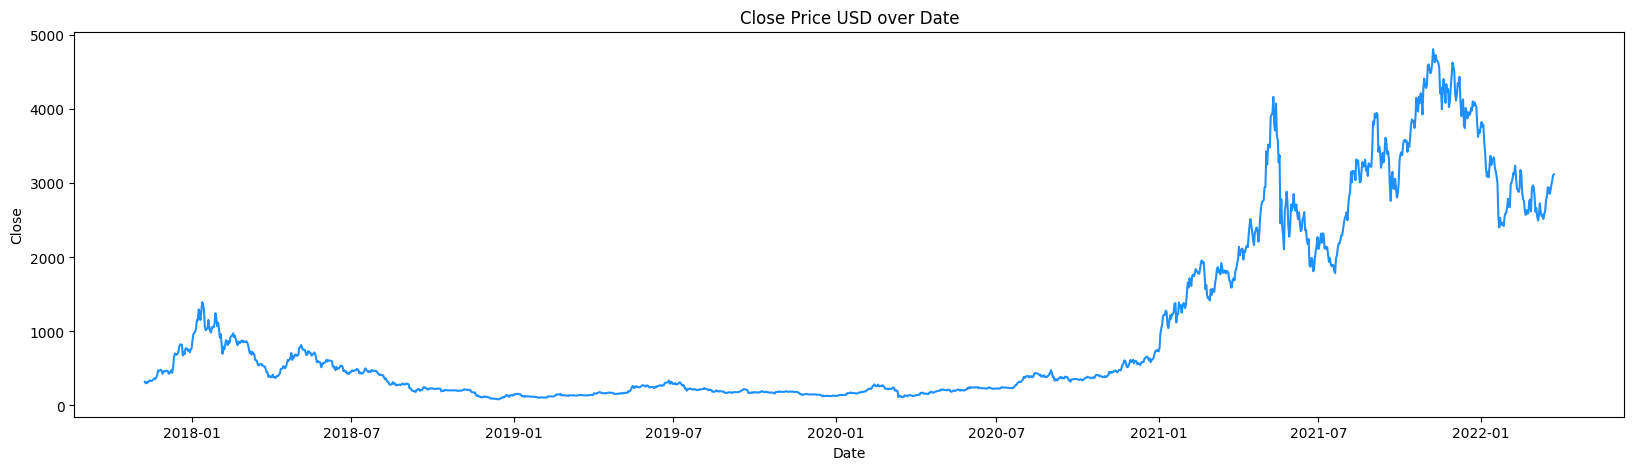

In [ ]:
## Displaying the closing price in a gap of 7months
tmp_df=df.groupby(["Date"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Date", y="Close", color="dodgerblue")
plt.title('Close Price USD over Date')
plt.show()

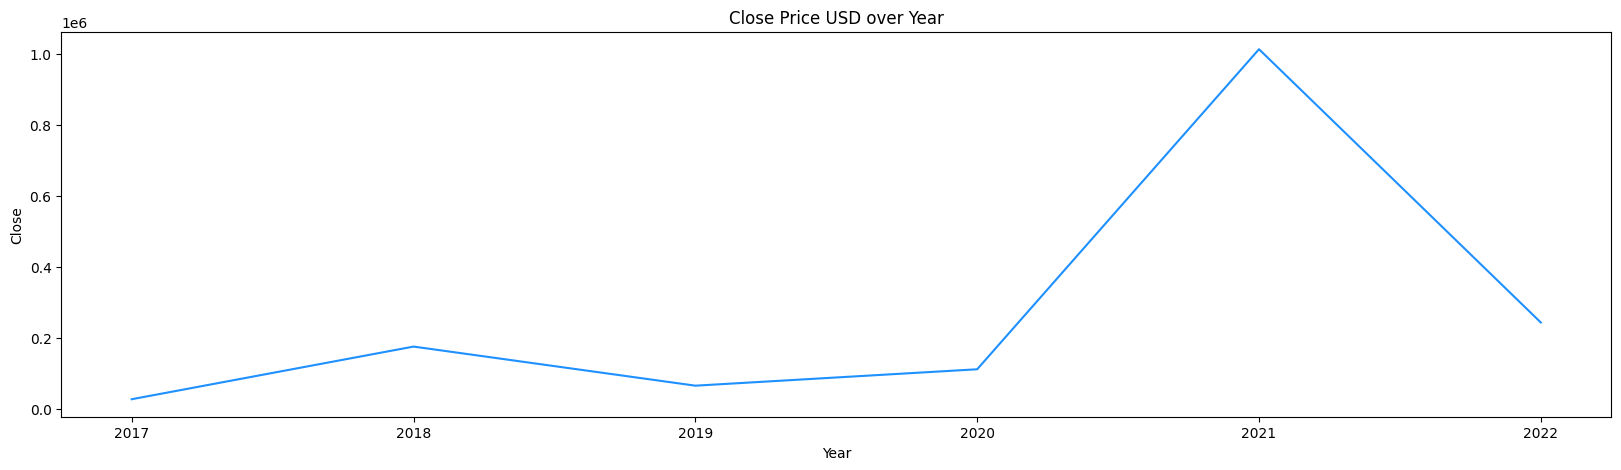

In [ ]:

tmp_df=df.groupby(["Year"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Year", y="Close", color="dodgerblue")
plt.title('Close Price USD over Year')
plt.show()

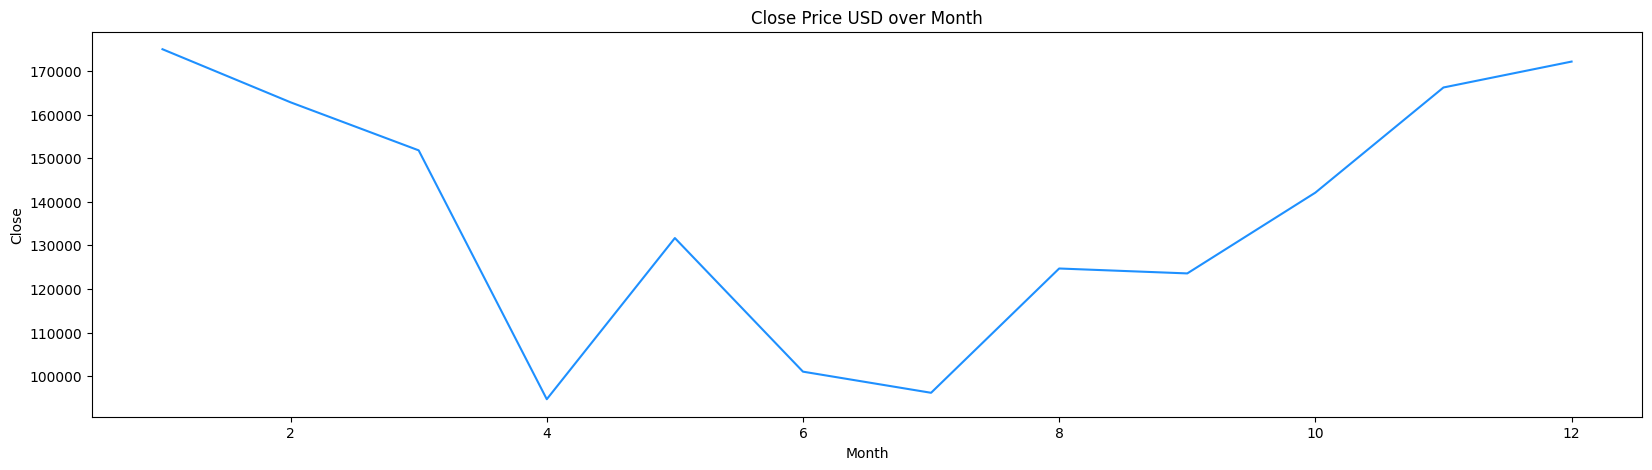

In [ ]:
tmp_df=df.groupby(["Month"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Month", y="Close", color="dodgerblue")
plt.title('Close Price USD over Month')
plt.show()

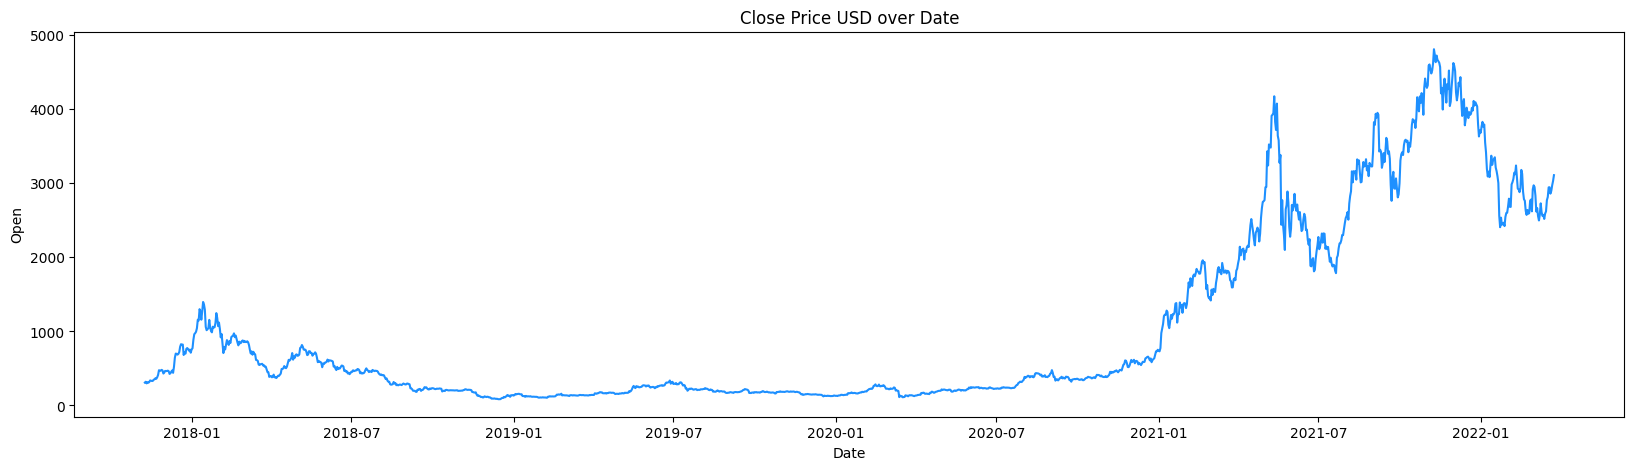

In [ ]:
tmp_df=df.groupby(["Date"])["Open"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Date", y="Open", color="dodgerblue")
plt.title('Close Price USD over Date')
plt.show()

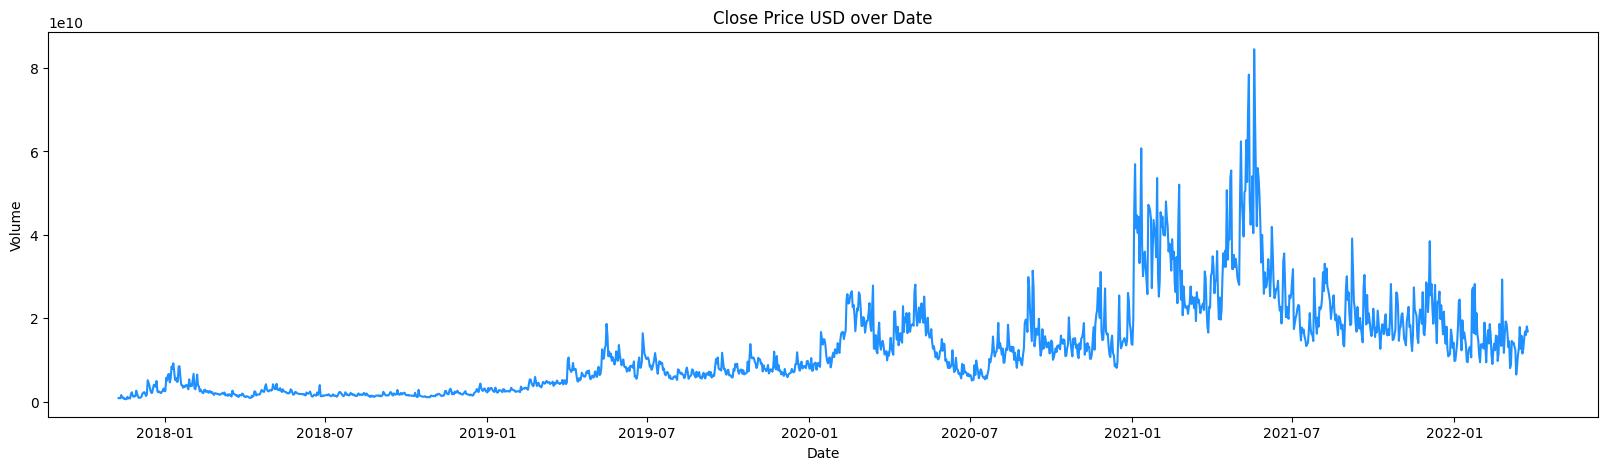

In [ ]:
tmp_df=df.groupby(["Date"])["Volume"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Date", y="Volume", color="dodgerblue")
plt.title('Close Price USD over Date')
plt.show()

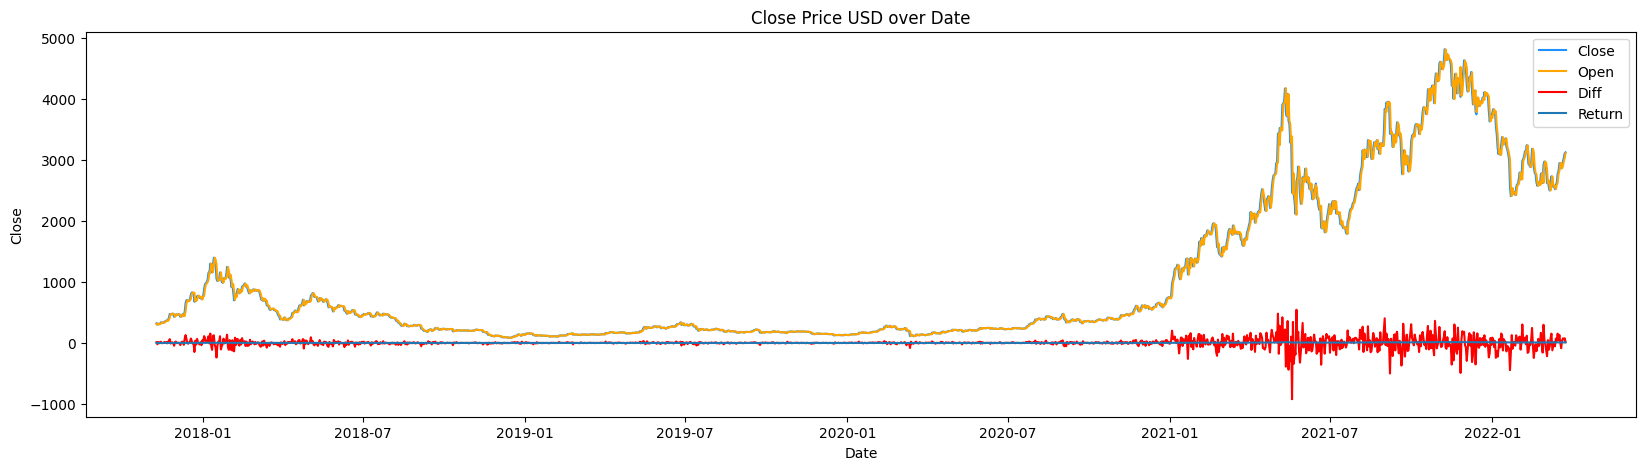

In [ ]:
tmp_df=df.groupby(["Date"])[["Open","Close", "Volume", "Return"]].sum().reset_index()
tmp_df["Volume"] = np.log(tmp_df["Volume"])
tmp_df["Diff"] = tmp_df["Close"] - tmp_df["Open"]

plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df, x="Date", y="Close", color="dodgerblue", label="Close")
sns.lineplot(data=tmp_df, x="Date", y="Open", color="orange", label="Open")
sns.lineplot(data=tmp_df, x="Date", y="Diff", color="red", label="Diff")
sns.lineplot(data=tmp_df, x="Date", y="Return", label="Return")
plt.title('Close Price USD over Date')
plt.legend()
plt.show()

<Axes: >

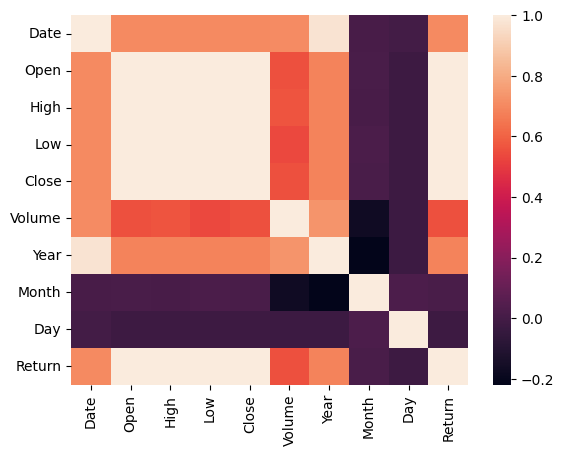

In [ ]:
sns.heatmap(df.corr())

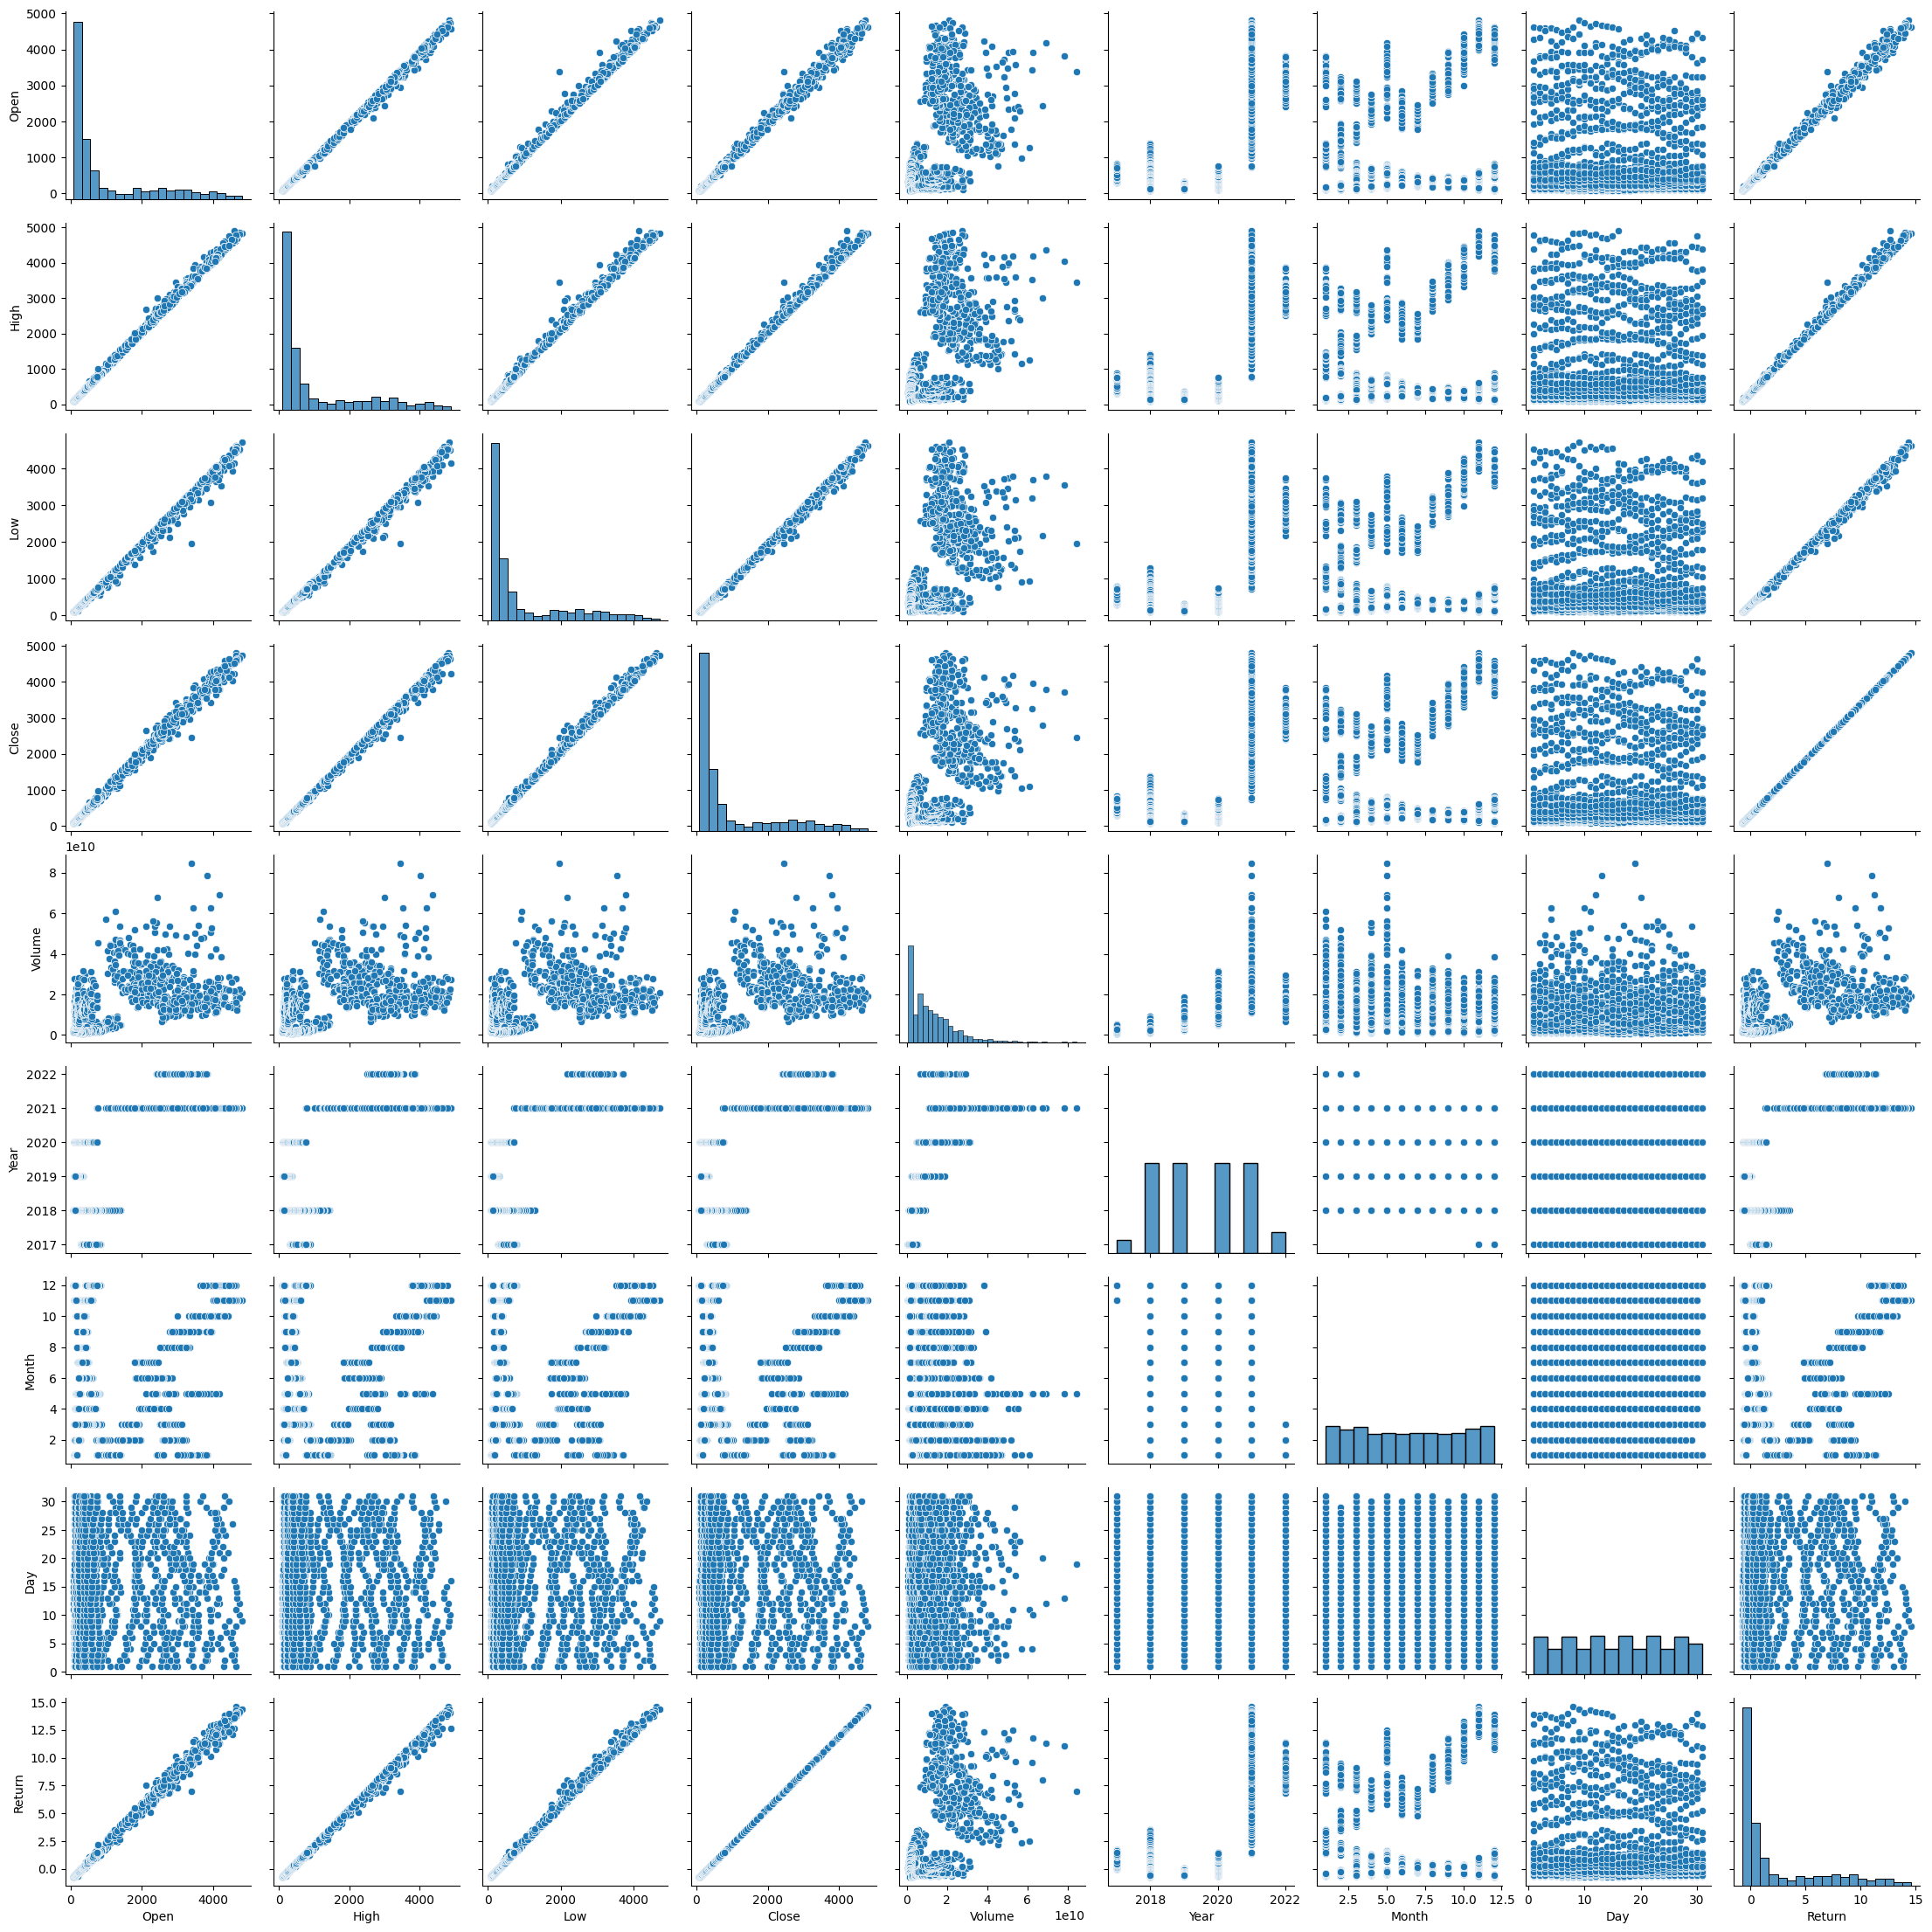

In [ ]:
sns.pairplot(df)

In [ ]:
df=df[["Date", "Close", "Volume", "Year", "Month", "Day"]]

In [ ]:
df.head()

,Date,Close,Volume,Year,Month,Day
0,2017-11-09,320.884003,893249984,2017,11,9
1,2017-11-10,299.252991,885985984,2017,11,10
2,2017-11-11,314.681000,842300992,2017,11,11
3,2017-11-12,307.907990,1613479936,2017,11,12
4,2017-11-13,316.716003,1041889984,2017,11,13


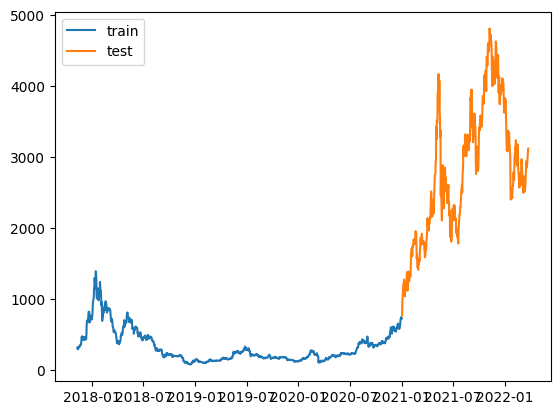

In [ ]:
## Visualizing the training and testing data split

train_df=df[df['Date'] <= '2021'][['Close', 'Date']].set_index('Date')
test_df=df[df['Date'] > '2021'][['Close', 'Date']].set_index('Date')
plt.plot(train_df)
plt.plot(test_df)
plt.legend(['train', 'test'])

In [ ]:
df.drop(["Date"], axis=1, inplace=True) ## Dropping the Date column as it is no longer required

<ipython-input-30-e7d70ec1df19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Date"], axis=1, inplace=True) ## Dropping the Date column as it is no longer required


In [ ]:
df.head()

,Close,Volume,Year,Month,Day
0,320.884003,893249984,2017,11,9
1,299.252991,885985984,2017,11,10
2,314.681000,842300992,2017,11,11
3,307.907990,1613479936,2017,11,12
4,316.716003,1041889984,2017,11,13


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(df)

In [ ]:
dataset

array([[0.0500395 , 0.0032377 , 0.        , 0.90909091, 0.26666667],
       [0.0454642 , 0.00315108, 0.        , 0.90909091, 0.3       ],
       [0.04872747, 0.00263016, 0.        , 0.90909091, 0.33333333],
       ...,
       [0.62328607, 0.18348221, 1.        , 0.18181818, 0.73333333],
       [0.6395717 , 0.20806731, 1.        , 0.18181818, 0.76666667],
       [0.64263315, 0.19389586, 1.        , 0.18181818, 0.8       ]])

In [ ]:
TEST_PERCENT=len(test_df)/len(df)
TEST_PERCENT

0.28035043804755944

In [ ]:
train_len=int(len(dataset) * (1-TEST_PERCENT))
test_len=len(dataset)-train_len

In [ ]:
train=dataset[0:train_len]
train

array([[0.0500395 , 0.0032377 , 0.        , 0.90909091, 0.26666667],
       [0.0454642 , 0.00315108, 0.        , 0.90909091, 0.3       ],
       [0.04872747, 0.00263016, 0.        , 0.90909091, 0.33333333],
       ...,
       [0.14114675, 0.19881477, 0.6       , 1.        , 0.96666667],
       [0.13822454, 0.15865641, 0.6       , 1.        , 1.        ],
       [0.13665174, 0.15537906, 0.8       , 0.        , 0.        ]])

In [ ]:
test=dataset[len(train):]
test

array([[0.14599385, 0.22798437, 0.8       , 0.        , 0.03333333],
       [0.18850276, 0.53157767, 0.8       , 0.        , 0.06666667],
       [0.20219319, 0.67163678, 0.8       , 0.        , 0.1       ],
       ...,
       [0.62328607, 0.18348221, 1.        , 0.18181818, 0.73333333],
       [0.6395717 , 0.20806731, 1.        , 0.18181818, 0.76666667],
       [0.64263315, 0.19389586, 1.        , 0.18181818, 0.8       ]])

In [ ]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    data_x, data_y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        if out_end_ix > len(sequence):
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        data_x.append(seq_x[:,1:])
        data_y.append(seq_y[:,0])
    return np.array(data_x), np.array(data_y)

In [ ]:
n_steps_in, n_steps_out = 180, 1
n_features = 4

X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)
X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

In [ ]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(970, 180, 4) (970, 1)
(268, 180, 4) (268, 1)


In [ ]:
!pip install livelossplot

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKerasTF

In [ ]:
model_weight_file = "best_model.keras"

lr_reduce = ReduceLROnPlateau(monitor="val_loss", factor=0, min_delta=0.001, patience=1, verbose=1) #could change factor to 0.5

checkpoint = ModelCheckpoint(model_weight_file, monitor="val_loss", verbose=1, save_best_only=True, mode="min")

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

callbacks = [PlotLossesKerasTF(), es, checkpoint]

In [ ]:
from tensorflow.keras.regularizers import l1

model = Sequential()

model.add(LSTM(128, input_shape=(n_steps_in, n_features), return_sequences=True, dropout=0.6, recurrent_dropout=0.3))
model.add(LSTM(64, dropout=0.6, recurrent_dropout=0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.02)))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.0005), metrics=["mean_squared_error"])

In [ ]:
# Adjust early stopping patience
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
callbacks = [PlotLossesKerasTF(), es, checkpoint]

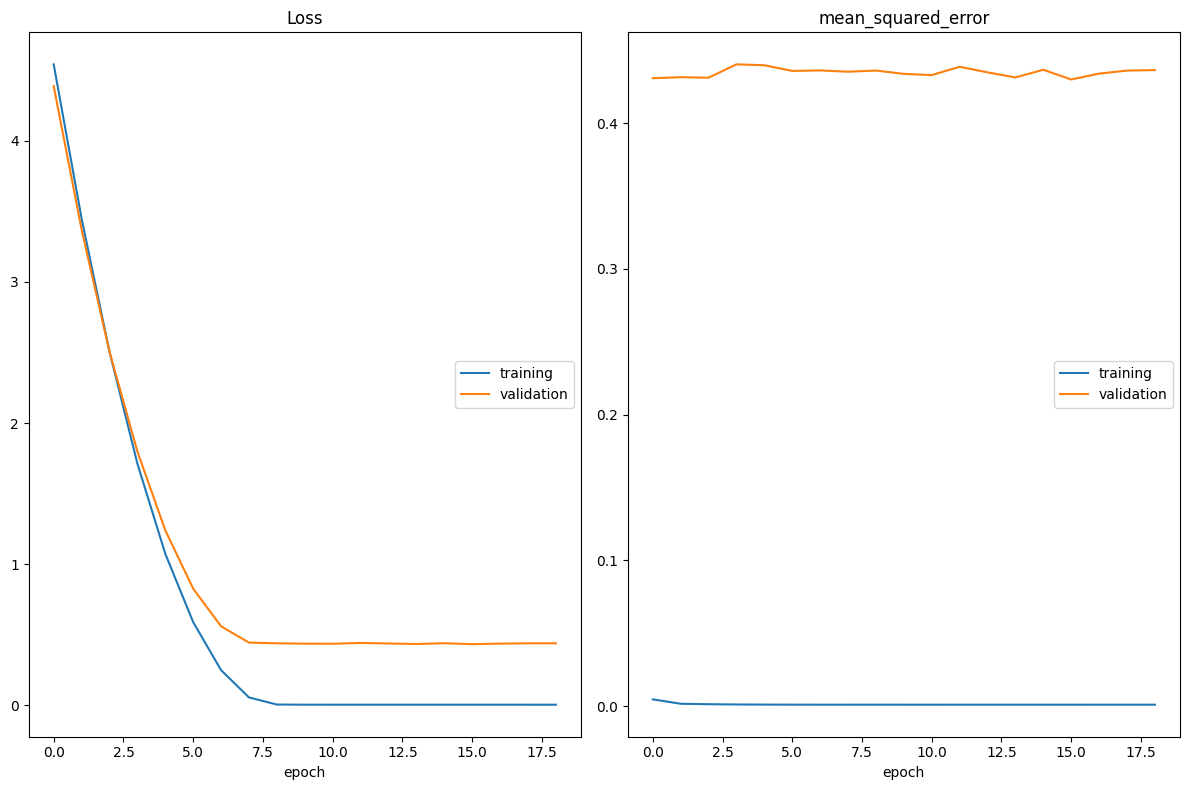

Loss
	training         	 (min:    0.003, max:    4.543, cur:    0.003)
	validation       	 (min:    0.432, max:    4.388, cur:    0.439)
mean_squared_error
	training         	 (min:    0.001, max:    0.005, cur:    0.001)
	validation       	 (min:    0.430, max:    0.440, cur:    0.436)

Epoch 19: val_loss did not improve from 0.43237
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - loss: 0.0034 - mean_squared_error: 9.9229e-04 - val_loss: 0.4387 - val_mean_squared_error: 0.4364
Epoch 19: early stopping


In [ ]:
EPOCHS = 20
BATCH_SIZE = 16

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks, validation_data=(X_test, y_test))

In [ ]:
import math

def model_score(model, X_train, y_train, X_test, y_test):
    train_score = model.evaluate(X_train, y_train, verbose=1)
    print("Train score: %0.5f MSE(%.2f RMSE)" % (train_score[0], math.sqrt(train_score[0])))

    test_score = model.evaluate(X_test, y_test, verbose=1)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (test_score[0], math.sqrt(test_score[0])))

In [ ]:
model_score(model, X_train, y_train, X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0038 - mean_squared_error: 0.0015
Train score: 0.00329 MSE(0.06 RMSE)
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.3913 - mean_squared_error: 0.3890
Test Score: 0.43872 MSE (0.66 RMSE)


In [ ]:
def invTransform(scaler, data):
    dummy = pd.DataFrame(np.zeros((len(data), scaler.n_features_in_)))
    dummy[0] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=dummy.columns)
    return dummy[0].values

In [ ]:
pred = model.predict(X_test)
pred = invTransform(scaler, pred)
pred[:10]

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step


array([259.59379677, 259.59309228, 259.5941138 , 259.59619205,
       259.5992566 , 259.60304326, 259.60714693, 259.61126822,
       259.61510772, 259.61848929])

In [ ]:
pred_df = test_df.copy()
pred_df[:-n_steps_in]["Close"] = pred

<ipython-input-69-f50bae0b69a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df[:-n_steps_in]["Close"] = pred


In [ ]:
test_df.head()

,Close
Date,
2021-01-02,774.534973
2021-01-03,975.507690
2021-01-04,1040.233032
2021-01-05,1100.006104
2021-01-06,1207.112183


In [ ]:
pred_df.head()

,Close
Date,
2021-01-02,774.534973
2021-01-03,975.507690
2021-01-04,1040.233032
2021-01-05,1100.006104
2021-01-06,1207.112183


Red - Predicted Ethurem Series  ,  Blue - Ethurem Series


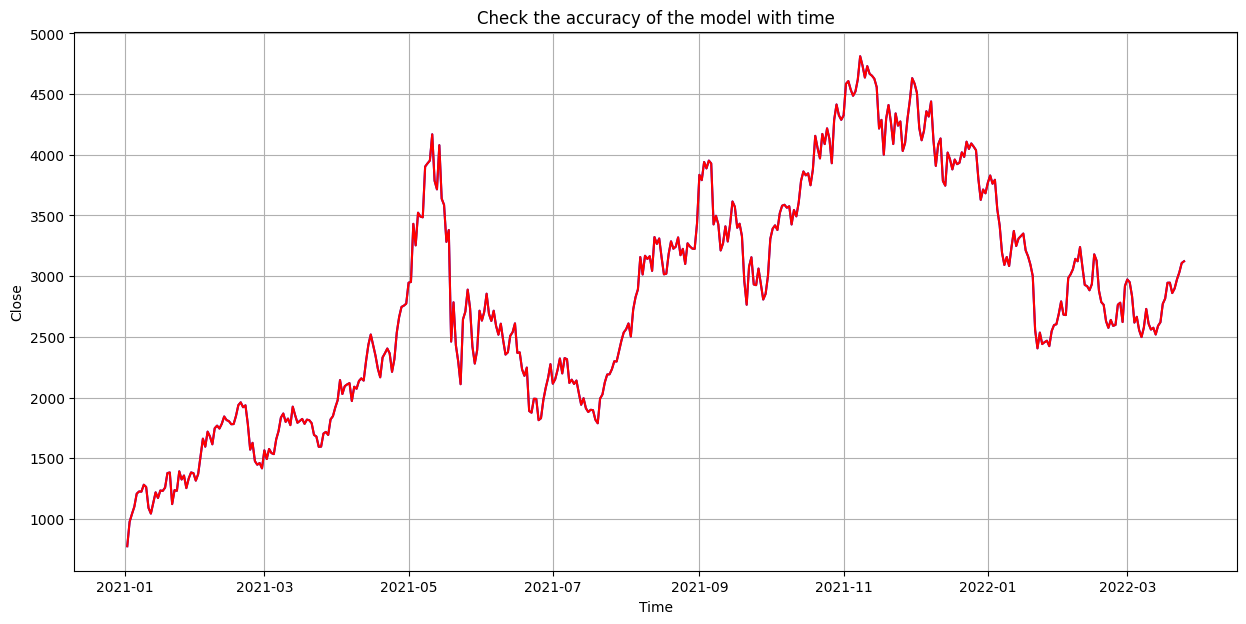

In [ ]:
print("Red - Predicted Ethurem Series  ,  Blue - Ethurem Series")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(test_df["Close"]+0.1, 'b', alpha=1)
plt.plot(pred_df["Close"] , 'r')
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [ ]:
print(train_df.iloc[-1])
print(test_df.iloc[0])

Close    730.367554
Name: 2021-01-01 00:00:00, dtype: float64
Close    774.534973
Name: 2021-01-02 00:00:00, dtype: float64


In [ ]:
print(test_df.iloc[0])
print(pred_df.iloc[0])

Close    774.534973
Name: 2021-01-02 00:00:00, dtype: float64
Close    774.534973
Name: 2021-01-02 00:00:00, dtype: float64


In [ ]:
test_df.head()

,Close
Date,
2021-01-02,774.534973
2021-01-03,975.507690
2021-01-04,1040.233032
2021-01-05,1100.006104
2021-01-06,1207.112183


In [ ]:
pred_df.head()

,Close
Date,
2021-01-02,774.534973
2021-01-03,975.507690
2021-01-04,1040.233032
2021-01-05,1100.006104
2021-01-06,1207.112183


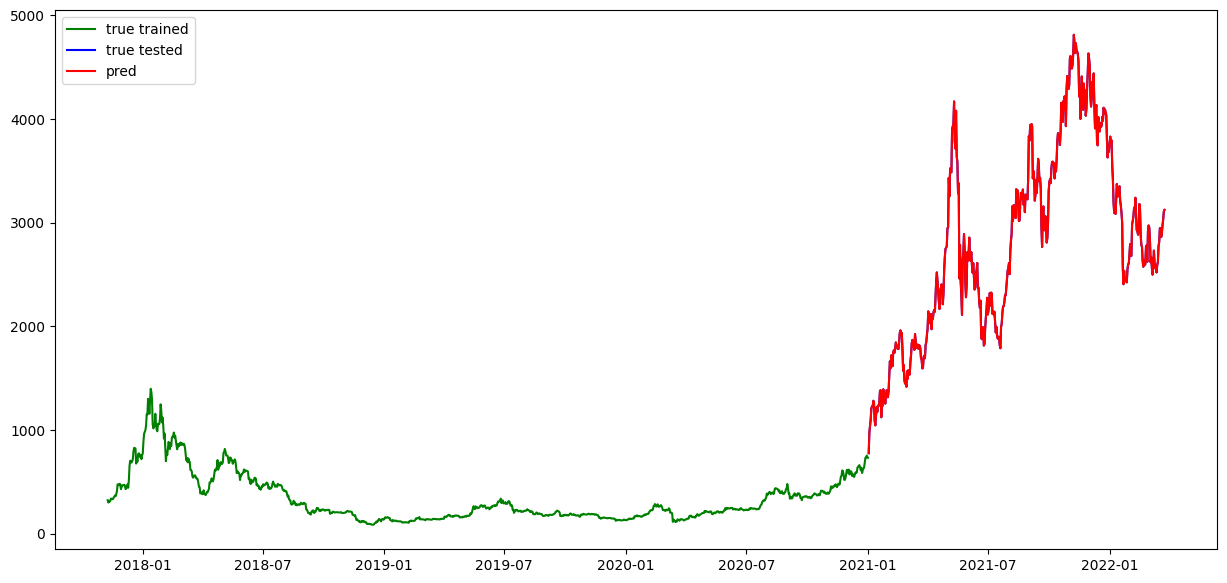

In [ ]:
plt.plot(train_df, 'g')
plt.plot(test_df, 'b')
plt.plot(pred_df , 'r')
plt.legend(['true trained', 'true tested', 'pred'])